In [60]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [438]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
import os
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.dummy import DummyClassifier

In [443]:
filenames=[]
for i in os.listdir("/project/ReadStatistics-data/ML_Lot_of_Data/"):
    if len(i)==7:
        filenames.append("/project/ReadStatistics-data/ML_Lot_of_Data/"+i+"/FinalFile.csv")

In [445]:
data = pd.read_csv(filenames[0])
# count number of 0 and 1 in the dataset
data["categorize"].value_counts()

categorize
0.0    11369
1.0     2694
Name: count, dtype: int64

In [446]:
2694/(2694+11369)

0.19156652207921496

In [448]:
import os
import shutil

# Ensure the target directory exists
target_dir = "/project/ReadStatistics-data/ML_Lot_of_Data/AllData/"
os.makedirs(target_dir, exist_ok=True)

for i in filenames:
    # Copy the file to the target directory
    shutil.copy(i, target_dir)
    
    # Construct the new file name
    new_file_name = os.path.join(target_dir, i.split("/")[-2] + ".csv")
    
    # Rename the file
    original_file = os.path.join(target_dir, "FinalFile.csv")
    if os.path.exists(original_file):
        os.rename(original_file, new_file_name)
    else:
        print(f"Warning: {original_file} does not exist.")

In [106]:
file_sizes_blood = []
ratio = 10**8/6.6


for i in filenames:
    os.chdir(i.rstrip("/FinalFile.csv"))
    # Get the count of lines in the BAM file
    c = !ls -lh file_name.bam | awk '{print $5}'
    
    file_sizes_blood.append(int(ratio * int(c[0].strip("G"))))

In [62]:
samples=[]
for i in os.listdir("/project/ReadStatistics-data/ML_Lot_of_Data/"):
    if len(i)==7:
        samples.append(i)

In [107]:
file_sizes_blood

[1121212121,
 2303030303,
 1333333333,
 1303030303,
 1090909090,
 803030303,
 1242424242,
 1469696969,
 1363636363,
 1348484848,
 1227272727,
 1272727272,
 1257575757,
 1015151515,
 1136363636,
 1666666666,
 1363636363,
 1439393939,
 1015151515]

In [63]:
for i in samples:
    print(i+" ")

HG00419 
NA19625 
NA19017 
HG03052 
NA18525 
HG02568 
HG03642 
HG01112 
HG01051 
HG03742 
HG00096 
NA18939 
HG00759 
NA20502 
HG00268 
HG02922 
HG01595 
HG01583 
NA19648 


In [64]:
filenames

['/project/ReadStatistics-data/ML_Lot_of_Data/HG00419/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/NA19625/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/NA19017/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG03052/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/NA18525/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG02568/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG03642/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG01112/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG01051/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG03742/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG00096/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/NA18939/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/HG00759/FinalFile.csv',
 '/project/ReadStatistics-data/ML_Lot_of_Data/NA20502/FinalFile.csv',
 '/project/ReadStati

In [65]:
def take_data_preprocess(filename,col="categorize"):
    x=pd.read_csv(filename)
    y=np.array(x[col])
    x=x.drop(["Unnamed: 0"],axis=1)
    y=np.array(y).reshape(len(y)  ,)
    y_1=np.where(y==0)[0]
    y_2=np.where(y==1)[0]
    index=np.random.choice(y_1,len(y_2), replace=False)
    index=np.concatenate((index, y_2), axis=0)
    x_32=x[[ 'AA_x', 'AT_x', 'AG_x', 'AC_x',
       'TA_x', 'TT_x', 'TG_x', 'TC_x', 'GA_x', 'GT_x', 'GG_x', 'GC_x', 'CA_x',
       'CT_x', 'CG_x', 'CC_x', 'AA_y', 'AT_y', 'AG_y', 'AC_y', 'TA_y', 'TT_y',
       'TG_y', 'TC_y', 'GA_y', 'GT_y', 'GG_y', 'GC_y', 'CA_y', 'CT_y', 'CG_y',
       'CC_y']]
    x_32_norm=np.array(normalize(np.array(x_32)))
    x, y = shuffle(x_32_norm[index], y[index], random_state=0)
    return x,y

In [66]:
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [67]:
def classification_report_with_f1_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return f1_score(y_true, y_pred,average='weighted') # return accuracy score

In [68]:
def confidence_score(y_true,y_pred_prob):

    keys=[0,1]
    dict={}
    i=0
    for key in keys:
        dict[key]=i
        i+=1

    cs=0.0
    for i in range(len(y_true)):
        cs+=y_pred_prob[i][dict[y_true[i]]]


    return cs/len(y_true)

In [69]:
def normalize(x):
    new_x=[]
    
    for i in range(len(x)):
        x_new=[]
        for j in range(16,32):
            a=np.sum(x[i][1:17])
            b=np.sum(x[i][17:33])
            x_new.append(x[i][j]*a/(0.01+ x[i][j-16]*b))
        new_x.append(x_new)
    return new_x

In [70]:
accuracy_blood=[]
for filename in filenames:
    x,y=take_data_preprocess(filename)
    x=StandardScaler().fit_transform(x)
    
    clf = RandomForestClassifier(class_weight='balanced', max_depth=20 ,n_estimators=800, criterion='entropy')
    
    originalclass = []
    predictedclass = []

    outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
    
    accuracy_blood.append(sk.metrics.accuracy_score(originalclass, predictedclass))
    
    print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      2694
         1.0       0.70      0.74      0.72      2694

    accuracy                           0.71      5388
   macro avg       0.71      0.71      0.71      5388
weighted avg       0.71      0.71      0.71      5388

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67      2690
         1.0       0.67      0.71      0.69      2690

    accuracy                           0.68      5380
   macro avg       0.68      0.68      0.68      5380
weighted avg       0.68      0.68      0.68      5380

              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68      2695
         1.0       0.68      0.72      0.70      2695

    accuracy                           0.69      5390
   macro avg       0.69      0.69      0.69      5390
weighted avg       0.69      0.69      0.69      5390

              preci

In [72]:
accuracy_blood

[0.7100965107646622,
 0.6840148698884758,
 0.6899814471243043,
 0.6827637444279346,
 0.7033803863298663,
 0.6957328385899815,
 0.6721706864564008,
 0.6998514115898959,
 0.673469387755102,
 0.7025974025974026,
 0.7024870081662955,
 0.7209647495361781,
 0.6896807720861173,
 0.6931354359925789,
 0.7038275733927908,
 0.6848068350668648,
 0.6805864884929473,
 0.6907503714710252,
 0.6946096654275093]

In [73]:
np.mean(accuracy_blood),np.max(accuracy_blood),np.min(accuracy_blood)

(0.6934161886924386, 0.7209647495361781, 0.6721706864564008)

In [447]:
filenames=[]
samples=[]
for i in os.listdir("/project/ReadStatistics-data/cancer_processing/"):
    if len(i)==10 and i!="SRR8670684":
        filenames.append("/project/ReadStatistics-data/cancer_processing/"+i+"/FinalFile.csv")
        samples.append(i)

In [75]:
cancer_types = ['DANG_PANCREAS',
 'TE11_OESOPHAGUS',
 'SHP77_LUNG',
 'T84_LARGE_INTESTINE',
 'SKMEL30_SKIN',
 'SKHEP1_LIVER',
 'NUGC3_STOMACH',
 'U2OS_BONE',
 'SW579_THYROID']

In [76]:
file_sizes=[1303041736,
1205710255,
1696808001,
1183872482,
1259117801,
1301672928,
1177541886,
1229410952,           
979656179]

In [19]:
def plot_roc_curves(model,train_x,train_y,test_x,test_y):
    
    model_dummy = DummyClassifier(strategy='stratified')
    model_dummy.fit(train_x, train_y)
    yhat = model_dummy.predict_proba(test_x)
    naive_probs = yhat[:, 1]


    yhat = model.predict_proba(test_x)
    pos_probs = yhat[:, 1]
    roc_auc = roc_auc_score(test_y, pos_probs)
    fpr, tpr, thresholds = sk.metrics.roc_curve(test_y, pos_probs)
    
    plt.figure(figsize=(7,4))
    plt.plot(fpr, tpr,label="ROC curve of class 1.0 (area = "+str(roc_auc)+")")
    plt.plot([0,1],[0,1],label="",color="black", linestyle='dashed')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves")
    plt.show()

In [79]:
def binary(y):
    y_out=[]
    for i in y:
        if i<0.5:
            y_out.append(0.0)
        else:
            y_out.append(1.0)
    return y_out

In [80]:
def take_data_preprocess(filename,col):
    x=pd.read_csv(filename)
    x=x[x[col]!=-1.0]
    y=np.array(x[col])
    y=binary(y)
    x=x.drop(["Unnamed: 0"],axis=1)
    y=np.array(y).reshape(len(y)  ,)
    y_1=np.where(y==0.0)[0]
    y_2=np.where(y==1.0)[0]
    index=np.random.choice(y_1,len(y_2), replace=False)
    index=np.concatenate((index, y_2), axis=0)
    x_32=x[[ 'AA_x', 'AT_x', 'AG_x', 'AC_x',
       'TA_x', 'TT_x', 'TG_x', 'TC_x', 'GA_x', 'GT_x', 'GG_x', 'GC_x', 'CA_x',
       'CT_x', 'CG_x', 'CC_x', 'AA_y', 'AT_y', 'AG_y', 'AC_y', 'TA_y', 'TT_y',
       'TG_y', 'TC_y', 'GA_y', 'GT_y', 'GG_y', 'GC_y', 'CA_y', 'CT_y', 'CG_y',
       'CC_y']]
    x_32_norm=np.array(normalize(np.array(x_32)))
    x, y = shuffle(x_32_norm[index], y[index], random_state=0)
    return x,y

In [81]:
results_cancer=[]
j=0
for filename in filenames:
    
    x,y=take_data_preprocess(filename,cancer_types[j])
    print(filename,len(x))
    x=StandardScaler().fit_transform(x)
    
    
    originalclass = []
    predictedclass = []
    predictedprob = []
    featureimportances = []

    outer_cv = StratifiedKFold(n_splits=10, shuffle=False)

    nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring= make_scorer(classification_report_with_f1_score))
    
    for train, test in outer_cv.split(x,y):
            clf = RandomForestClassifier(class_weight='balanced', max_depth=20 ,n_estimators=800, criterion='entropy')
            clf.fit(x[train], y[train])
            
            originalclass.extend(y[test])
            predictedclass.extend(clf.predict(x[test]))
            predictedprob.extend(clf.predict_proba(x[test]))
            featureimportances.append(clf.feature_importances_)
            
            
    
    results_cancer.append([originalclass,predictedclass,predictedprob,featureimportances])
    
    j+=1
    
    print(classification_report(originalclass, predictedclass))

/project/ReadStatistics-data/cancer_processing/SRR8788980/FinalFile.csv 10050
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70     10050
         1.0       0.70      0.68      0.69     10050

    accuracy                           0.70     20100
   macro avg       0.70      0.70      0.70     20100
weighted avg       0.70      0.70      0.70     20100

/project/ReadStatistics-data/cancer_processing/SRR8670672/FinalFile.csv 10354
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70     10354
         1.0       0.70      0.71      0.71     10354

    accuracy                           0.70     20708
   macro avg       0.70      0.70      0.70     20708
weighted avg       0.70      0.70      0.70     20708

/project/ReadStatistics-data/cancer_processing/SRR8670685/FinalFile.csv 9612
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69      9612
    

In [83]:
human_data=pd.read_csv("/project/ReadStatistics/ML_On_Datasets/FinalFile_19datasets_mean.csv")

In [84]:
def get_results(filename,col="categorize"):
    results=[]

    x,y=take_data_preprocess(filename,col)
    x=StandardScaler().fit_transform(x)


    originalclass = []
    predictedclass = []
    predictedprob = []
    featureimportances = []

    outer_cv = StratifiedKFold(n_splits=10, shuffle=False)

    for train, test in outer_cv.split(x,y):
            clf = RandomForestClassifier(class_weight='balanced', max_depth=20 , n_estimators=600) 
            clf.fit(x[train], y[train])

            originalclass.extend(y[test])
            predictedclass.extend(clf.predict(x[test]))
            predictedprob.extend(clf.predict_proba(x[test]))
            featureimportances.append(clf.feature_importances_)



    results.append([originalclass,predictedclass,predictedprob,featureimportances])
    return results

In [85]:
filename_human20 = "/project/ReadStatistics/ML_On_Datasets/FinalFile_20_datasets_mean.csv"
filename_human10 = "/project/ReadStatistics/ML_On_Datasets/FinalFile_10_datasets_mean.csv"

In [86]:
results_human20=get_results(filename_human20)
results_human10=get_results(filename_human10)

In [89]:
samples,accuracy_blood

(['SRR8788980',
  'SRR8670672',
  'SRR8670685',
  'SRR8670673',
  'SRR8670680',
  'SRR8670683',
  'SRR8670697',
  'SRR8670721',
  'SRR8670670'],
 [0.7100965107646622,
  0.6840148698884758,
  0.6899814471243043,
  0.6827637444279346,
  0.7033803863298663,
  0.6957328385899815,
  0.6721706864564008,
  0.6998514115898959,
  0.673469387755102,
  0.7025974025974026,
  0.7024870081662955,
  0.7209647495361781,
  0.6896807720861173,
  0.6931354359925789,
  0.7038275733927908,
  0.6848068350668648,
  0.6805864884929473,
  0.6907503714710252,
  0.6946096654275093])

In [103]:
len(file_sizes_blood)

0

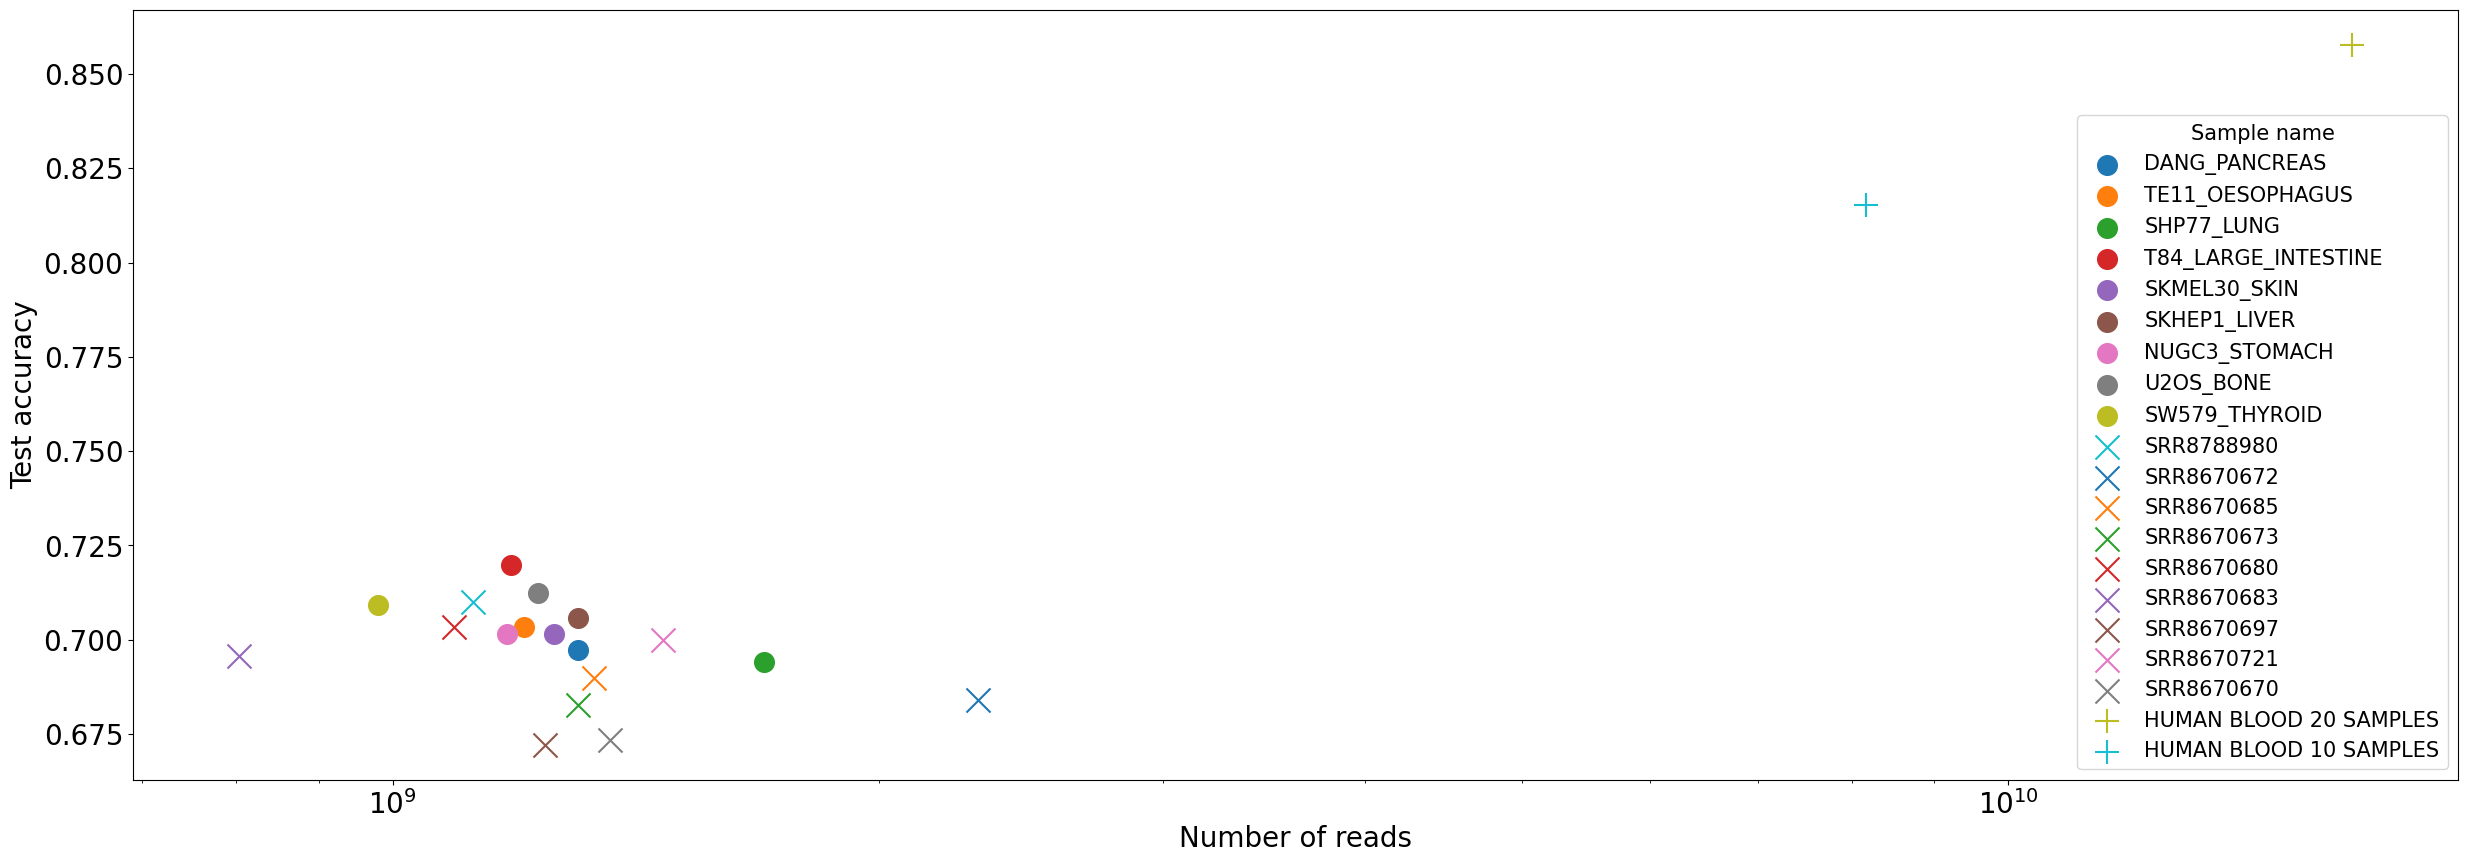

In [311]:
plt.figure(figsize=(30,10))
j=0
for i in results_cancer:
    acc=accuracy_score(i[0],i[1])
    plt.scatter(file_sizes[j],acc,label=cancer_types[j],s=200)
    j+=1

j=0
for i in accuracy_blood[:len(samples)]:
    plt.scatter(file_sizes_blood[j],i,label=samples[j],marker="x",s=300)
    j+=1


acc=accuracy_score(results_human20[0][0],results_human20[0][1])
plt.scatter(816687234*20,acc,label="HUMAN BLOOD 20 SAMPLES",marker="+",s=300)

acc=accuracy_score(results_human10[0][0],results_human10[0][1])
plt.scatter(816687234*10,acc,label="HUMAN BLOOD 10 SAMPLES",marker="+",s=300)
    
plt.xlabel("Number of reads",fontsize=20)
plt.ylabel("Test accuracy",fontsize=20)
plt.xscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title="Sample name",fontsize=15,title_fontsize=15, loc='lower right')

plt.savefig("/project/ReadStatistics/ML_Cancer_multiple/test_acc_vs_no_reads.png")

plt.show()

In [430]:
# Train a model on the human blood data 20 samples and test on the cancer data with thresholding 

x,y=take_data_preprocess(filename_human20,"categorize")
x=StandardScaler().fit_transform(x)

clf = RandomForestClassifier(class_weight='balanced', max_depth=20 ,n_estimators=800, criterion='entropy')
clf.fit(x,y)

accuracy_cancer=[]
j=0

for filename in filenames:
    
    
    x,y=take_data_preprocess(filename,cancer_types[j])
    x=StandardScaler().fit_transform(x)
    
    predictedclass = clf.predict(x) 
    
    originalclass = binary(y)
    
    accuracy_cancer.append(sk.metrics.accuracy_score(originalclass, predictedclass))
    
    print(classification_report(originalclass, predictedclass))
    
    j+=1

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66      5025
         1.0       0.66      0.70      0.68      5025

    accuracy                           0.67     10050
   macro avg       0.67      0.67      0.67     10050
weighted avg       0.67      0.67      0.67     10050

              precision    recall  f1-score   support

         0.0       0.75      0.52      0.61      5177
         1.0       0.63      0.82      0.71      5177

    accuracy                           0.67     10354
   macro avg       0.69      0.67      0.66     10354
weighted avg       0.69      0.67      0.66     10354

              precision    recall  f1-score   support

         0.0       0.76      0.49      0.60      4806
         1.0       0.62      0.84      0.72      4806

    accuracy                           0.67      9612
   macro avg       0.69      0.67      0.66      9612
weighted avg       0.69      0.67      0.66      9612

              preci

In [434]:
accuracy_cancer

[0.6684577114427861,
 0.670755263666216,
 0.6679151061173533,
 0.6880182421227198,
 0.6671801191209694,
 0.6672594533882441,
 0.6732057416267943,
 0.6913196776359973,
 0.6931776723823422]

In [431]:
filenames=[]
for i in os.listdir("/project/ReadStatistics-data/ML_Lot_of_Data/"):
    if len(i)==7:
        filenames.append("/project/ReadStatistics-data/ML_Lot_of_Data/"+i+"/FinalFile.csv")

In [433]:
# Train a model on the human blood data 20 samples and test on the blood data with thresholding

x,y=take_data_preprocess(filename_human20,"categorize")
x=StandardScaler().fit_transform(x)

clf = RandomForestClassifier(class_weight='balanced', max_depth=20 ,n_estimators=800, criterion='entropy')
clf.fit(x,y)

accuracy_blood=[]


for filename in filenames:
    x,y=take_data_preprocess(filename,"categorize")
    x=StandardScaler().fit_transform(x)
    
    predictedclass = clf.predict(x) 
    
    originalclass = binary(y)
    
    accuracy_blood.append(sk.metrics.accuracy_score(originalclass, predictedclass))
    
    print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

         0.0       0.73      0.54      0.62      2694
         1.0       0.64      0.81      0.71      2694

    accuracy                           0.67      5388
   macro avg       0.68      0.67      0.67      5388
weighted avg       0.68      0.67      0.67      5388

              precision    recall  f1-score   support

         0.0       0.74      0.46      0.57      2690
         1.0       0.61      0.83      0.70      2690

    accuracy                           0.65      5380
   macro avg       0.67      0.65      0.64      5380
weighted avg       0.67      0.65      0.64      5380

              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62      2695
         1.0       0.63      0.77      0.70      2695

    accuracy                           0.66      5390
   macro avg       0.67      0.66      0.66      5390
weighted avg       0.67      0.66      0.66      5390

              preci

In [437]:
np.mean(accuracy_cancer),np.std(accuracy_cancer),np.mean(accuracy_blood),np.std(accuracy_blood)

(0.6763654430559358,
 0.010460270742490042,
 0.6598625820611232,
 0.015043303016259531)